In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_images.shape

(60000, 28, 28)

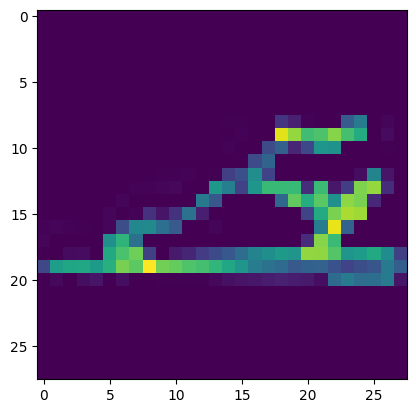

In [ ]:
plt.imshow(train_images[300])

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [ ]:

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


Modelo de Datos

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size = 2, padding='same', activation ='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size = 2, padding='same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

Compilar - entrenar

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
              )

In [ ]:
model.fit(train_images,train_labels,batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 15s 5ms/step - loss: 0.5854 - accuracy: 0.7876
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4027 - accuracy: 0.8556
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3582 - accuracy: 0.8703
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3313 - accuracy: 0.8802
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3196 - accuracy: 0.8856
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3093 - accuracy: 0.8885
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3016 - accuracy: 0.8907
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2984 - accuracy: 0.8936
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2978 - accuracy: 0.8944
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2959 - accuracy: 0.896

In [ ]:
model.evaluate(test_images,test_labels, verbose=0)

[0.26201483607292175, 0.906000018119812]

Analisis de resultado

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)

In [ ]:
score

[0.26201483607292175, 0.906000018119812]

CAllbacks

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=1)

model.fit(train_images,
         train_labels,
         batch_size=64,
        callbacks=[early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2773 - accuracy: 0.9032
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2739 - accuracy: 0.9050
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2789 - accuracy: 0.9038


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='firstredCNN',
                                   verbose=1,
                                   monitor='accuracy',
                                   save_best_only=True)
model.fit(train_images,
         train_labels,
         batch_size=64,
        callbacks=[checkpoint],
         epochs=10)

Epoch 1/10
931/938 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.9029
Epoch 1: accuracy improved from -inf to 0.90277, saving model to firstredCNN


938/938 [==============================] - 6s 6ms/step - loss: 0.2768 - accuracy: 0.9028
Epoch 2/10
930/938 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.9032
Epoch 2: accuracy improved from 0.90277 to 0.90317, saving model to firstredCNN


938/938 [==============================] - 6s 6ms/step - loss: 0.2766 - accuracy: 0.9032
Epoch 3/10
930/938 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.9035
Epoch 3: accuracy improved from 0.90317 to 0.90360, saving model to firstredCNN


938/938 [==============================] - 5s 6ms/step - loss: 0.2797 - accuracy: 0.9036
Epoch 4/10
936/938 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.9044
Epoch 4: accuracy improved from 0.90360 to 0.90433, saving model to firstredCNN


938/938 [==============================] - 5s 6ms/step - loss: 0.2800 - accuracy: 0.9043
Epoch 5/10
929/938 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.9026
Epoch 5: accuracy did not improve from 0.90433
938/938 [==============================] - 5s 5ms/step - loss: 0.2793 - accuracy: 0.9028
Epoch 6/10
927/938 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.9040
Epoch 6: accuracy did not improve from 0.90433
938/938 [==============================] - 4s 4ms/step - loss: 0.2807 - accuracy: 0.9041
Epoch 7/10
930/938 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.9046
Epoch 7: accuracy improved from 0.90433 to 0.90453, saving model to firstredCNN


938/938 [==============================] - 6s 6ms/step - loss: 0.2746 - accuracy: 0.9045
Epoch 8/10
928/938 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.9041
Epoch 8: accuracy did not improve from 0.90453
938/938 [==============================] - 4s 4ms/step - loss: 0.2795 - accuracy: 0.9042
Epoch 9/10
930/938 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.9050
Epoch 9: accuracy improved from 0.90453 to 0.90500, saving model to firstredCNN


938/938 [==============================] - 5s 5ms/step - loss: 0.2748 - accuracy: 0.9050
Epoch 10/10
935/938 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.9041
Epoch 10: accuracy did not improve from 0.90500
938/938 [==============================] - 5s 5ms/step - loss: 0.2758 - accuracy: 0.9043


In [ ]:
model2= model
model2.load_weights('firstredCNN')

In [ ]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9090


[0.255484938621521, 0.9089999794960022]